<a href="https://colab.research.google.com/github/RitamPatra76/UCB-AdOptimizer/blob/main/UCB_AdOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

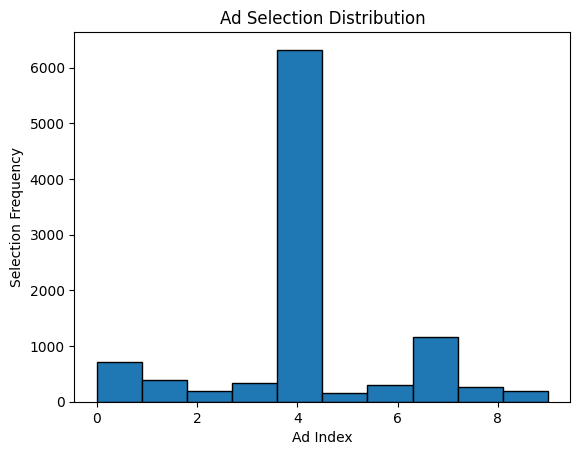

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

data = pd.read_csv('Ads_CTR_Optimisation.csv')

num_rounds = 10000
num_ads = 10

selected_ads = []
ad_selections = [0] * num_ads
ad_rewards = [0] * num_ads
overall_reward = 0

for round in range(num_rounds):
    chosen_ad = 0
    max_confidence = 0

    for ad in range(num_ads):
        if ad_selections[ad] > 0:
            avg_reward = ad_rewards[ad] / ad_selections[ad]
            confidence_interval = math.sqrt((3/2) * math.log(round + 1) / ad_selections[ad])
            confidence_bound = avg_reward + confidence_interval
        else:
            confidence_bound = float('inf')

        if confidence_bound > max_confidence:
            max_confidence = confidence_bound
            chosen_ad = ad

    selected_ads.append(chosen_ad)
    ad_selections[chosen_ad] += 1
    reward = data.values[round, chosen_ad]
    ad_rewards[chosen_ad] += reward
    overall_reward += reward

plt.hist(selected_ads, bins=num_ads, edgecolor='black')
plt.title('Ad Selection Distribution')
plt.xlabel('Ad Index')
plt.ylabel('Selection Frequency')
plt.show()
